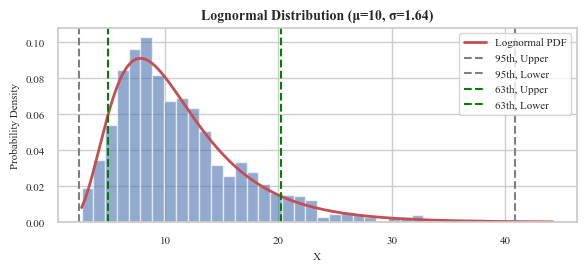

In [60]:
import numpy as np
import matplotlib.pyplot as ax
from scipy.stats import lognorm
import seaborn as sns
import matplotlib.pyplot as ax
import warnings

_mu = "\u03BC"
_lam = "\u03BB"
_sig = "\u03C3"

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
sns.set(font = "times new roman",
        style = "whitegrid",
        font_scale= 1)
# Generate random data for lognormal distribution
scale = 10
shape = 1.64
mu_g = np.log(scale) # Mean of underlying normal distribution
sigma = np.log(shape) # Standard deviation of underlying normal distribution
s = np.random.lognormal(mu_g, sigma, 1000) # Generate lognormally distributed data
cm = 1/2.54 
# Create histogram of the generated data
fig,ax = ax.subplots(figsize=(15*cm, 7*cm))
ax.hist(s, bins=40, density=True, alpha=0.6, color="b")
ax.set_xlabel('X',fontsize=8)
ax.set_ylabel('Probability Density',fontsize=8)
ax.set_title(f'Lognormal Distribution ({_mu}={scale}, {_sig}={shape})', 
             fontsize=10, fontweight= "bold")
ax.grid(True)

# Overlay the probability density function (pdf) of the lognormal distribution
x = np.linspace(min(s), max(s), 10000)
pdf = lognorm.pdf(x, sigma, scale=np.exp(mu_g))
 
ax.plot(x, pdf, 'r-', lw=2, label='Lognormal PDF')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(8)
ax.axvline(x = scale/sigma/sigma, color = 'grey', label = '95th, Upper', linestyle="--")
ax.axvline(x = scale*sigma*sigma, color = 'grey', label = '95th, Lower', linestyle="--")

ax.axvline(x = scale/sigma, color = 'green', label = '63th, Upper', linestyle="--")
ax.axvline(x = scale*sigma, color = 'green', label = '63th, Lower', linestyle="--")

ax.legend(fontsize=8)
fig.tight_layout()
fig.show()
fig.savefig("pdf.svg", dpi=600)